# **Red Neuronal Profunda con Keras**  


Vamos a repetir el diseño y entrenamiento de nuestra red neuronal 

**Después de esta tarea, serás capaz de:**  
✅ Construir y aplicar una **red neuronal profunda** para **aprendizaje supervisado** con **Keras**.  



## **1 - Paquetes**

Primero, importemos todos los paquetes que necesitarás durante esta asignación.  

- [**numpy**](www.numpy.org) es el paquete fundamental para la computación científica con Python.  
- [**matplotlib**](http://matplotlib.org) es una biblioteca para graficar en Python.  
- [**h5py**](http://www.h5py.org) es un paquete común para interactuar con conjuntos de datos almacenados en un archivo **H5**.  
- [**PIL**](http://www.pythonware.com/products/pil/) y [**scipy**](https://www.scipy.org/) se utilizan aquí para probar tu modelo con tu propia imagen al final.  
- **dnn_app_utils** proporciona las funciones implementadas en el cuaderno *"Construyendo una DNN"*.  
- `np.random.seed(1)` se usa para mantener consistentes todas las llamadas a funciones aleatorias. Esto nos ayudará a calificar tu trabajo.

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## **2 - Conjunto de Datos**  

Usarás el mismo conjunto de datos **"Gato vs No-Gato"** que en la asignación **"Regresión Logística como intro a las ANN"**. En ese modelo se logró un **70% de precisión en el conjunto de prueba** para clasificar imágenes de gatos vs no-gatos. ¡Esperamos que tu nuevo modelo tenga un mejor resultado!  

**Enunciado del Problema**:  
Se te proporciona un conjunto de datos (`data.h5`) que contiene:  
- Un **conjunto de entrenamiento** con $ m_{train} $ imágenes etiquetadas como **gato (1)** o **no-gato (0)**.  
- Un **conjunto de prueba** con $ m_{test} $ imágenes etiquetadas como **gato (1)** o **no-gato (0)**.  
- Cada imagen tiene la forma **(num_px, num_px, 3)**, donde **3** corresponde a los **tres canales de color (RGB)**.  

Vamos a familiarizarnos más con el conjunto de datos. **Carga los datos ejecutando la celda a continuación.** 

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()
train_y=train_y.T
test_y=test_y.T

El siguiente código mostrará una imagen del conjunto de datos. Siéntete libre de cambiar el índice y volver a ejecutar la celda varias veces para ver otras imágenes. 

y = 0. It's a non-cat picture.


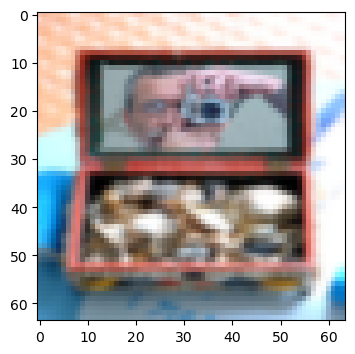

In [3]:
# Ejemplo
index = 15
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[index,0]) + ". It's a " + classes[train_y[index,0]].decode("utf-8") +  " picture.")

In [4]:
# Explorar el dataset
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (209, 1)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (50, 1)


Con Keras, no necesitamos "aplanar" a mano las imágenes, lo puede hacer automaticamente cob una capa *flatten*. Lo que seguimos necesitando hacer es **normalizar** las imágenes antes de ingresarlas a la red neuronal. El código para hacerlo se encuentra en la celda siguiente.


In [5]:
# Normalizamos los valores de la entrada entre 0 y 1.
train_x = train_x_orig/255.
test_x = test_x_orig/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (209, 64, 64, 3)
test_x's shape: (50, 64, 64, 3)


(209, 64, 64, 3) es el tamaño del vector de entrada.

## **3 - Arquitectura del modelo**

Vamos a repetir las dos redes del ejercicio anterior
---

**3.1 - Red Neuronal de 2 Capas**

El modelo se resume como:  
***ENTRADA -> LINEAR -> RELU -> LINEAR -> SIGMOIDE -> SALIDA***. </center></caption>


In [6]:
print(train_x.shape)
print(train_y.shape)

(209, 64, 64, 3)
(209, 1)


In [10]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam,SGD
from keras.initializers import RandomNormal, RandomUniform

# Para hacer el entrenamiento reproducible, si no, los pesos iniciales se inicializan aleatoriamente 
# y el resultado puede variar.
import keras
keras.utils.set_random_seed(812)

# Define the model
model = Sequential([
    layers.Input(shape=(64,64,3)),
    layers.Flatten(),
    layers.Dense(7, activation='relu'),   # hidden layer
    layers.Dense(1, activation='sigmoid') # Output layer
    ])

# Compilar el modelo
model.compile(optimizer=SGD(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])

# Enytrenamiento
history=model.fit(train_x, train_y, epochs=2500, batch_size=209, verbose=1)

# Evaluacion
train_loss, train_acc = model.evaluate(train_x, train_y, verbose=0)
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=0)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Epoch 1/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4067 - loss: 0.7080
Epoch 2/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6316 - loss: 0.6697
Epoch 3/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6507 - loss: 0.6600
Epoch 4/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6507 - loss: 0.6576
Epoch 5/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6507 - loss: 0.6548
Epoch 6/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6507 - loss: 0.6516
Epoch 7/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6507 - loss: 0.6486
Epoch 8/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6507 - loss: 0.6459
Epoch 9/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6507 - loss: 0.6437
Epoch 10/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6507 - loss: 0.6419
Epoch 11/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6507 - loss: 0.6402
Epoch 12/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy:

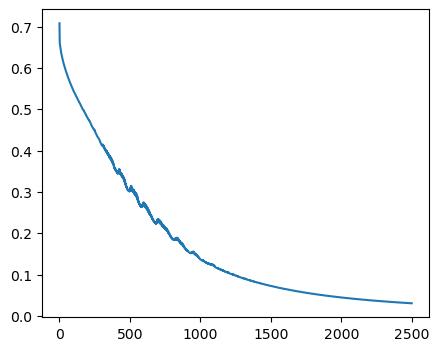

In [11]:
plt.plot(history.history['loss'],label='training loss')



**3.2 - Red Neuronal Profunda de $L$ Capas**

El modelo se resume como:  
***[LINEAR -> RELU] $ \times (L-1) $ -> LINEAR -> SIGMOIDE***. </center></caption>



In [26]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam
from keras.initializers import RandomNormal, RandomUniform

import keras
keras.utils.set_random_seed(812)


# Define the model
model2 = Sequential([
    layers.Input(shape=(64,64,3)),
    layers.Flatten(),
    layers.Dense(20, activation='relu'),    # hidden layer
    layers.Dense(7, activation='relu'),    # hidden layer
    layers.Dense(5, activation='relu'),    # hidden layer
    layers.Dense(1, activation='sigmoid') # Output layer
    ])

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2=model2.fit(train_x, train_y, epochs=1500, batch_size=209, verbose=1,validation_data=(test_x,test_y))

# Evaluate the model
train_loss, train_acc = model2.evaluate(train_x, train_y, verbose=0)
test_loss, test_acc = model2.evaluate(test_x, test_y, verbose=0)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Epoch 1/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3493 - loss: 0.7325 - val_accuracy: 0.6600 - val_loss: 0.6562
Epoch 2/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3589 - loss: 0.7203 - val_accuracy: 0.6400 - val_loss: 0.6683
Epoch 3/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3923 - loss: 0.7110 - val_accuracy: 0.6400 - val_loss: 0.6785
Epoch 4/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4450 - loss: 0.7049 - val_accuracy: 0.6400 - val_loss: 0.6841
Epoch 5/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4306 - loss: 0.7008 - val_accuracy: 0.5800 - val_loss: 0.6880
Epoch 6/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4641 - loss: 0.6979 - val_accuracy: 0.5600 - val_loss: 0.6907
Epoch 7/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5072 - loss: 0.6957 - val_accuracy: 0.5200 - val_loss: 0.6928
Epoch 8/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5407 - loss: 0.6937 - val_accuracy: 0.5000 - v

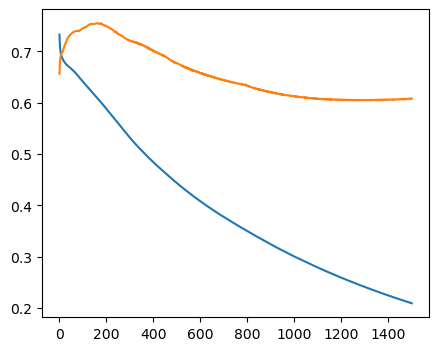

In [27]:
plt.plot(history2.history['loss'],label='training loss')
plt.plot(history2.history['val_loss'],label='validation loss')

In [ ]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │       245,780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           147 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245,975 (960.84 KB)

 Trainable params: 245,973 (960.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (8.00 B)

None
